[Data Visualization: gŕaficos de comparação e distribuição](https://cursos.alura.com.br/course/data-visualization-graficos-comparacao-distribuicao)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = (
    "#03045e",
    "#0077b6",
    "#00b4d8",
    "#90e0ef",
    "#CDDBF3",
)

CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = (
    "#212529",
    "#495057",
    "#adb5bd",
    "#dee2e6",
    "#f8f9fa",
)

VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = (
    "#e76f51",
    "#f4a261",
    "#e9c46a",
    "#4c956c",
    "#2a9d8f",
)

In [3]:
vendas = pd.read_csv(
    "https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv"
)
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [4]:
vendas[["data_pedido", "data_envio"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data_pedido  8940 non-null   object
 1   data_envio   8940 non-null   object
dtypes: object(2)
memory usage: 139.8+ KB


In [5]:
for col in ["data_pedido", "data_envio"]:
    vendas[col] = pd.to_datetime(vendas[col], format="%Y-%m-%d")

vendas[["data_pedido", "data_envio"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data_pedido  8940 non-null   datetime64[ns]
 1   data_envio   8940 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 139.8 KB


In [6]:
vendas_anuais = vendas[["data_pedido", "vendas"]].copy()
vendas_anuais["ano"] = vendas_anuais.data_pedido.dt.year

vendas_anuais = vendas_anuais.drop(columns="data_pedido")

In [7]:
# Agrupar por ano
df_vendas_anuais = vendas_anuais.groupby(by="ano").sum()

`sns.set_style =! set_theme`

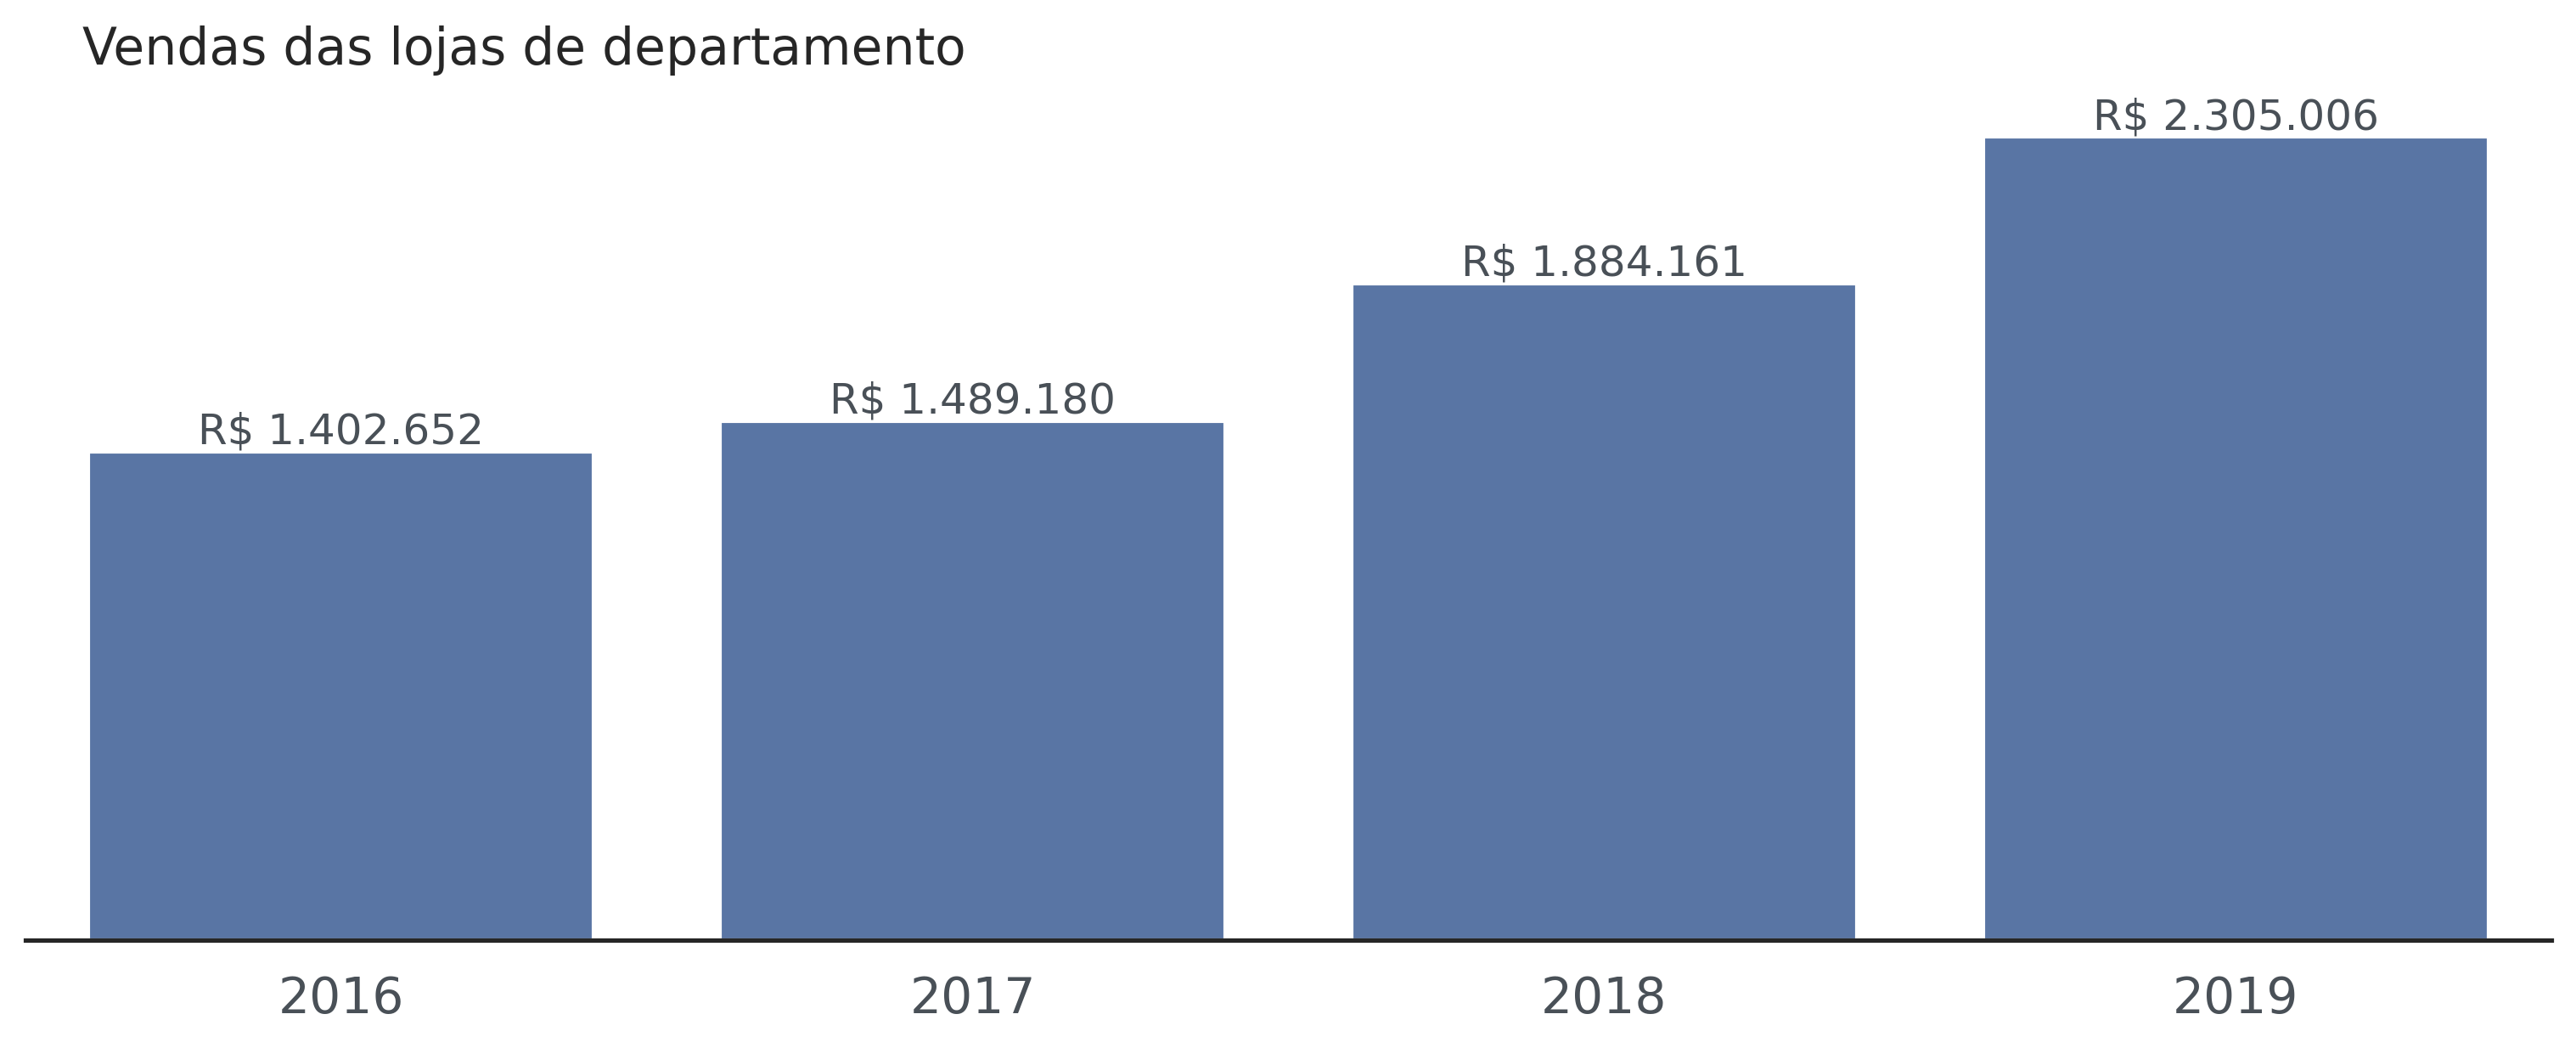

In [8]:
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 4), dpi=300, layout="constrained")
fig.suptitle("Vendas das lojas de departamento", x=0.20)


# Plot
ax = sns.barplot(data=df_vendas_anuais, x=df_vendas_anuais.index, y="vendas")

ax.set_ylabel("")
ax.set_xlabel("")


# Ticks
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
ax.set_yticklabels([])

# Add value labels on top of each bar
for bar in ax.patches:
    value = f"{bar.get_height():,.0f}".replace(",", ".")
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(
        f"R$ {value}", (x, y), ha="center", va="bottom", fontsize=12, color=CINZA2
    )
sns.despine(left=True)

# ax.bar_label()

In [9]:
# Função que plota o gráfico.
from matplotlib.axes import Axes


def plot_bars_with_pallete(cores: list[str] = [AZUL2]) -> Axes:
    sns.set_theme(style="white")
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300, layout="constrained")
    fig.suptitle("Vendas das lojas de departamento", x=0.20)

    ax = sns.barplot(
        data=df_vendas_anuais, x=df_vendas_anuais.index, y="vendas", palette=cores
    )

    ax.set_ylabel("")
    ax.set_xlabel("")

    # Ticks
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
    ax.set_yticklabels([])

    # Add value labels on top of each bar
    for bar in ax.patches:
        value = f"{bar.get_height():,.0f}".replace(",", ".")
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        ax.annotate(
            f"R$ {value}", (x, y), ha="center", va="bottom", fontsize=12, color=CINZA2
        )
    sns.despine(left=True)

    return ax


In [10]:
df_vendas_anuais.index

Index([2016, 2017, 2018, 2019], dtype='int32', name='ano')

In [11]:
for venda in df_vendas_anuais["vendas"]:
    print(venda)

1402652.33
1489179.52
1884161.41
2305006.29


/tmp/ipykernel_15326/479175457.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


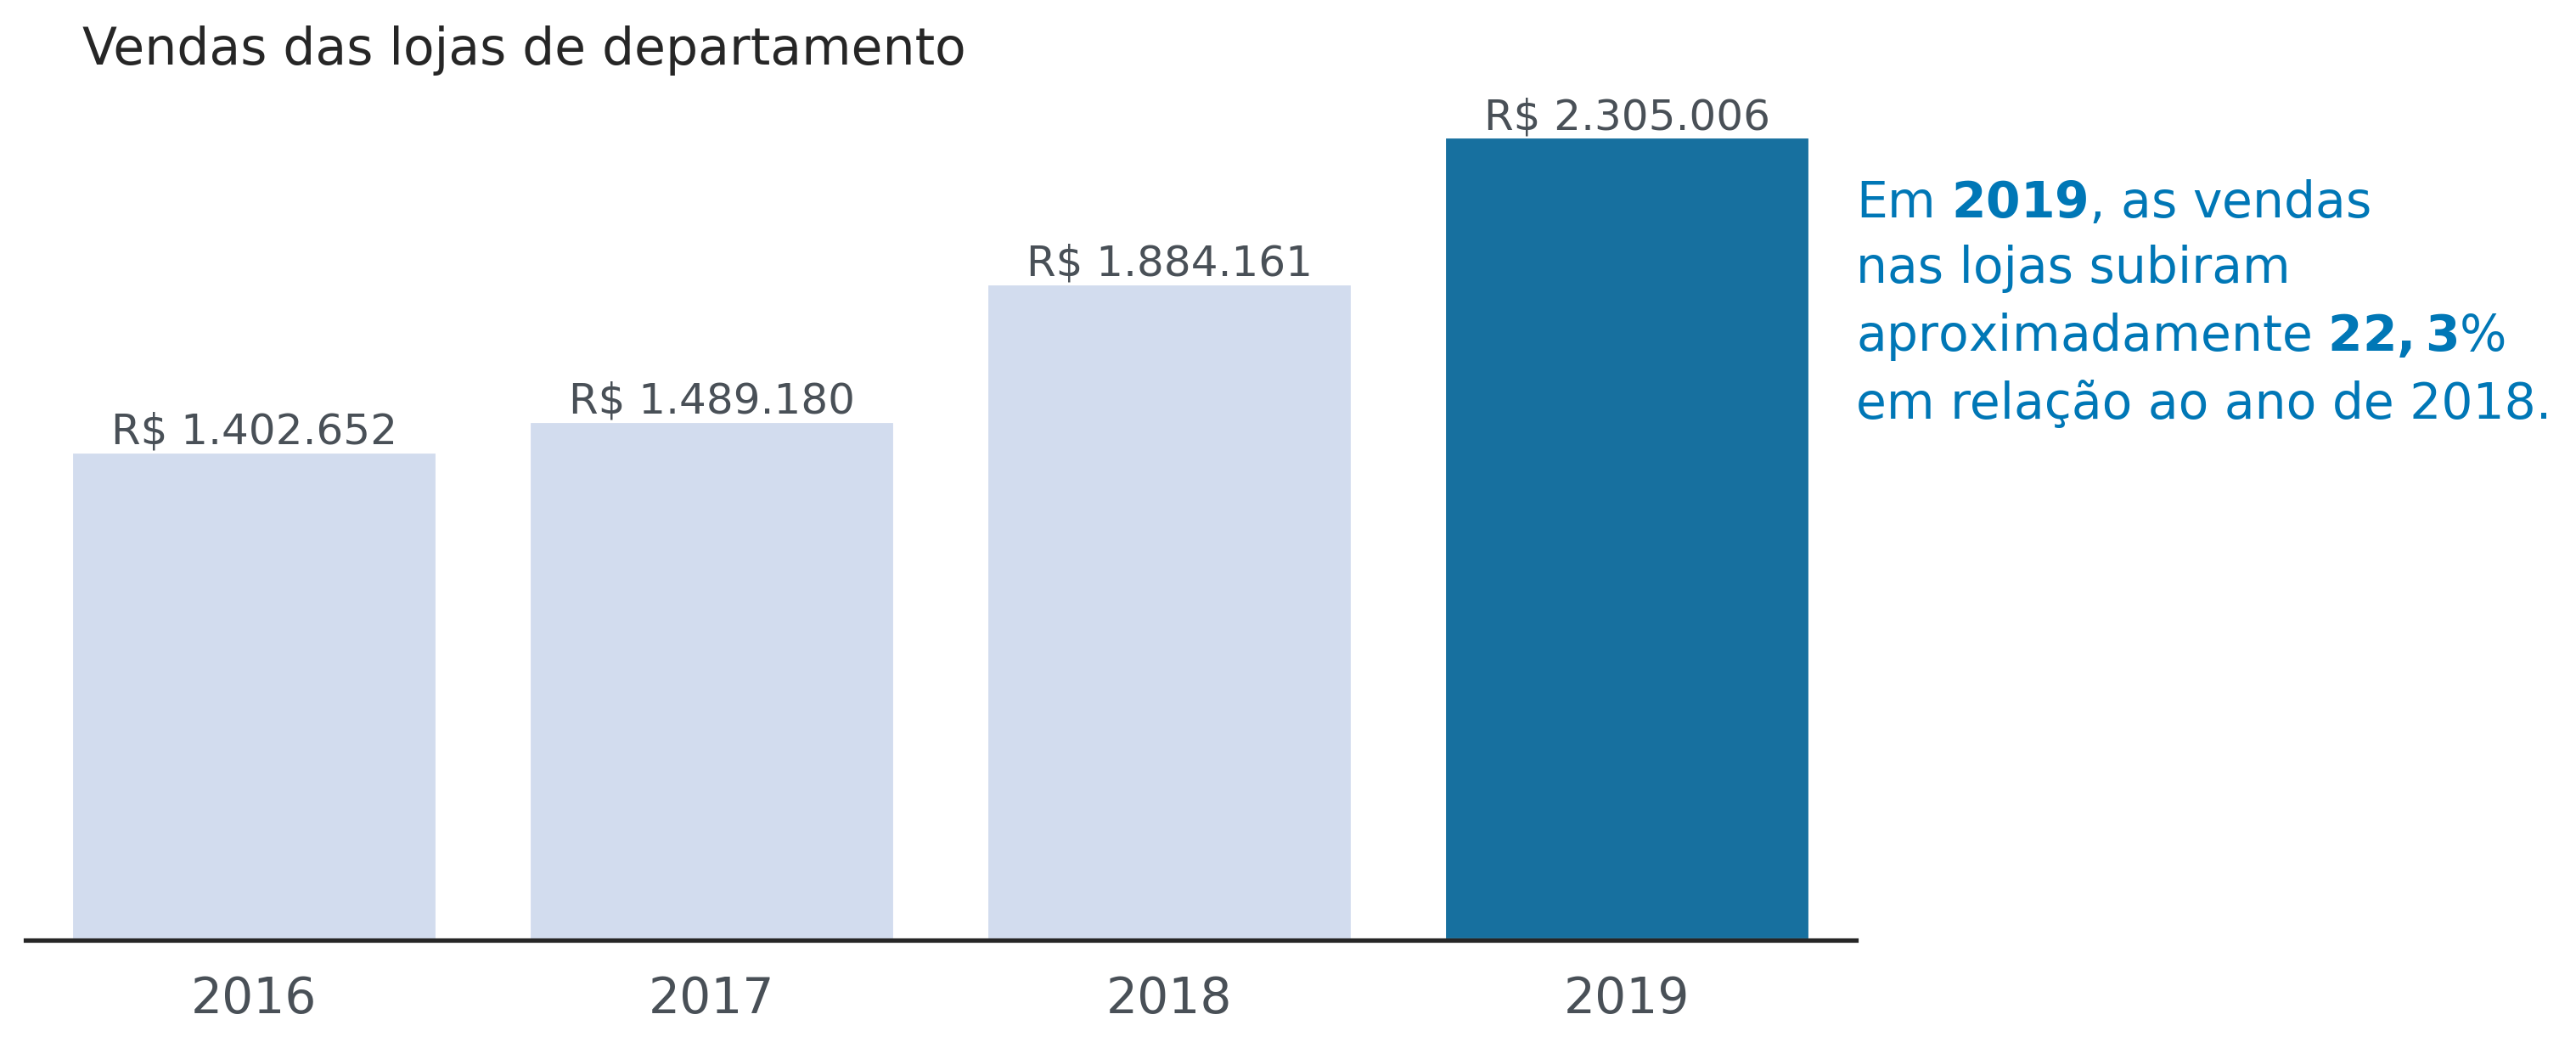

In [12]:
cores = []

for ano in df_vendas_anuais.index:
    if df_vendas_anuais.loc[ano, "vendas"] == df_vendas_anuais["vendas"].max():
        cores.append(AZUL2)
    else:
        cores.append(AZUL5)

ax = plot_bars_with_pallete(cores=cores)


# Anotando uma conclusão no gráfico
ax.text(
    3.5,
    1.5e6,
    "Em $\\bf{2019}$, as vendas\n"
    "nas lojas subiram\n"
    "aproximadamente $\\bf{22,3}$%\n"
    "em relação ao ano de 2018.",
    fontsize=14,
    linespacing=1.45,
    color=AZUL2,
)
fig = ax.get_figure()


__Qual  top 7 lucros em produtos__

In [13]:
top7 = vendas[["tipo_produto", "lucro"]].copy()
top7 = top7.groupby(by="tipo_produto").sum().sort_values(by="lucro", ascending=False).reset_index()
top7


,tipo_produto,lucro
0,peças de reposição,91148.67
1,pneus,67460.05
2,ferramentas automotivas,63330.22
3,pesticidas,53343.89
4,ferramentas de jardinagem,53202.88
5,ferramentas,41020.34
6,vasos,33941.85
7,mobiliário de exterior,26784.59
8,iluminação,20264.54
9,fertilizantes,11254.88


/tmp/ipykernel_15326/246749153.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


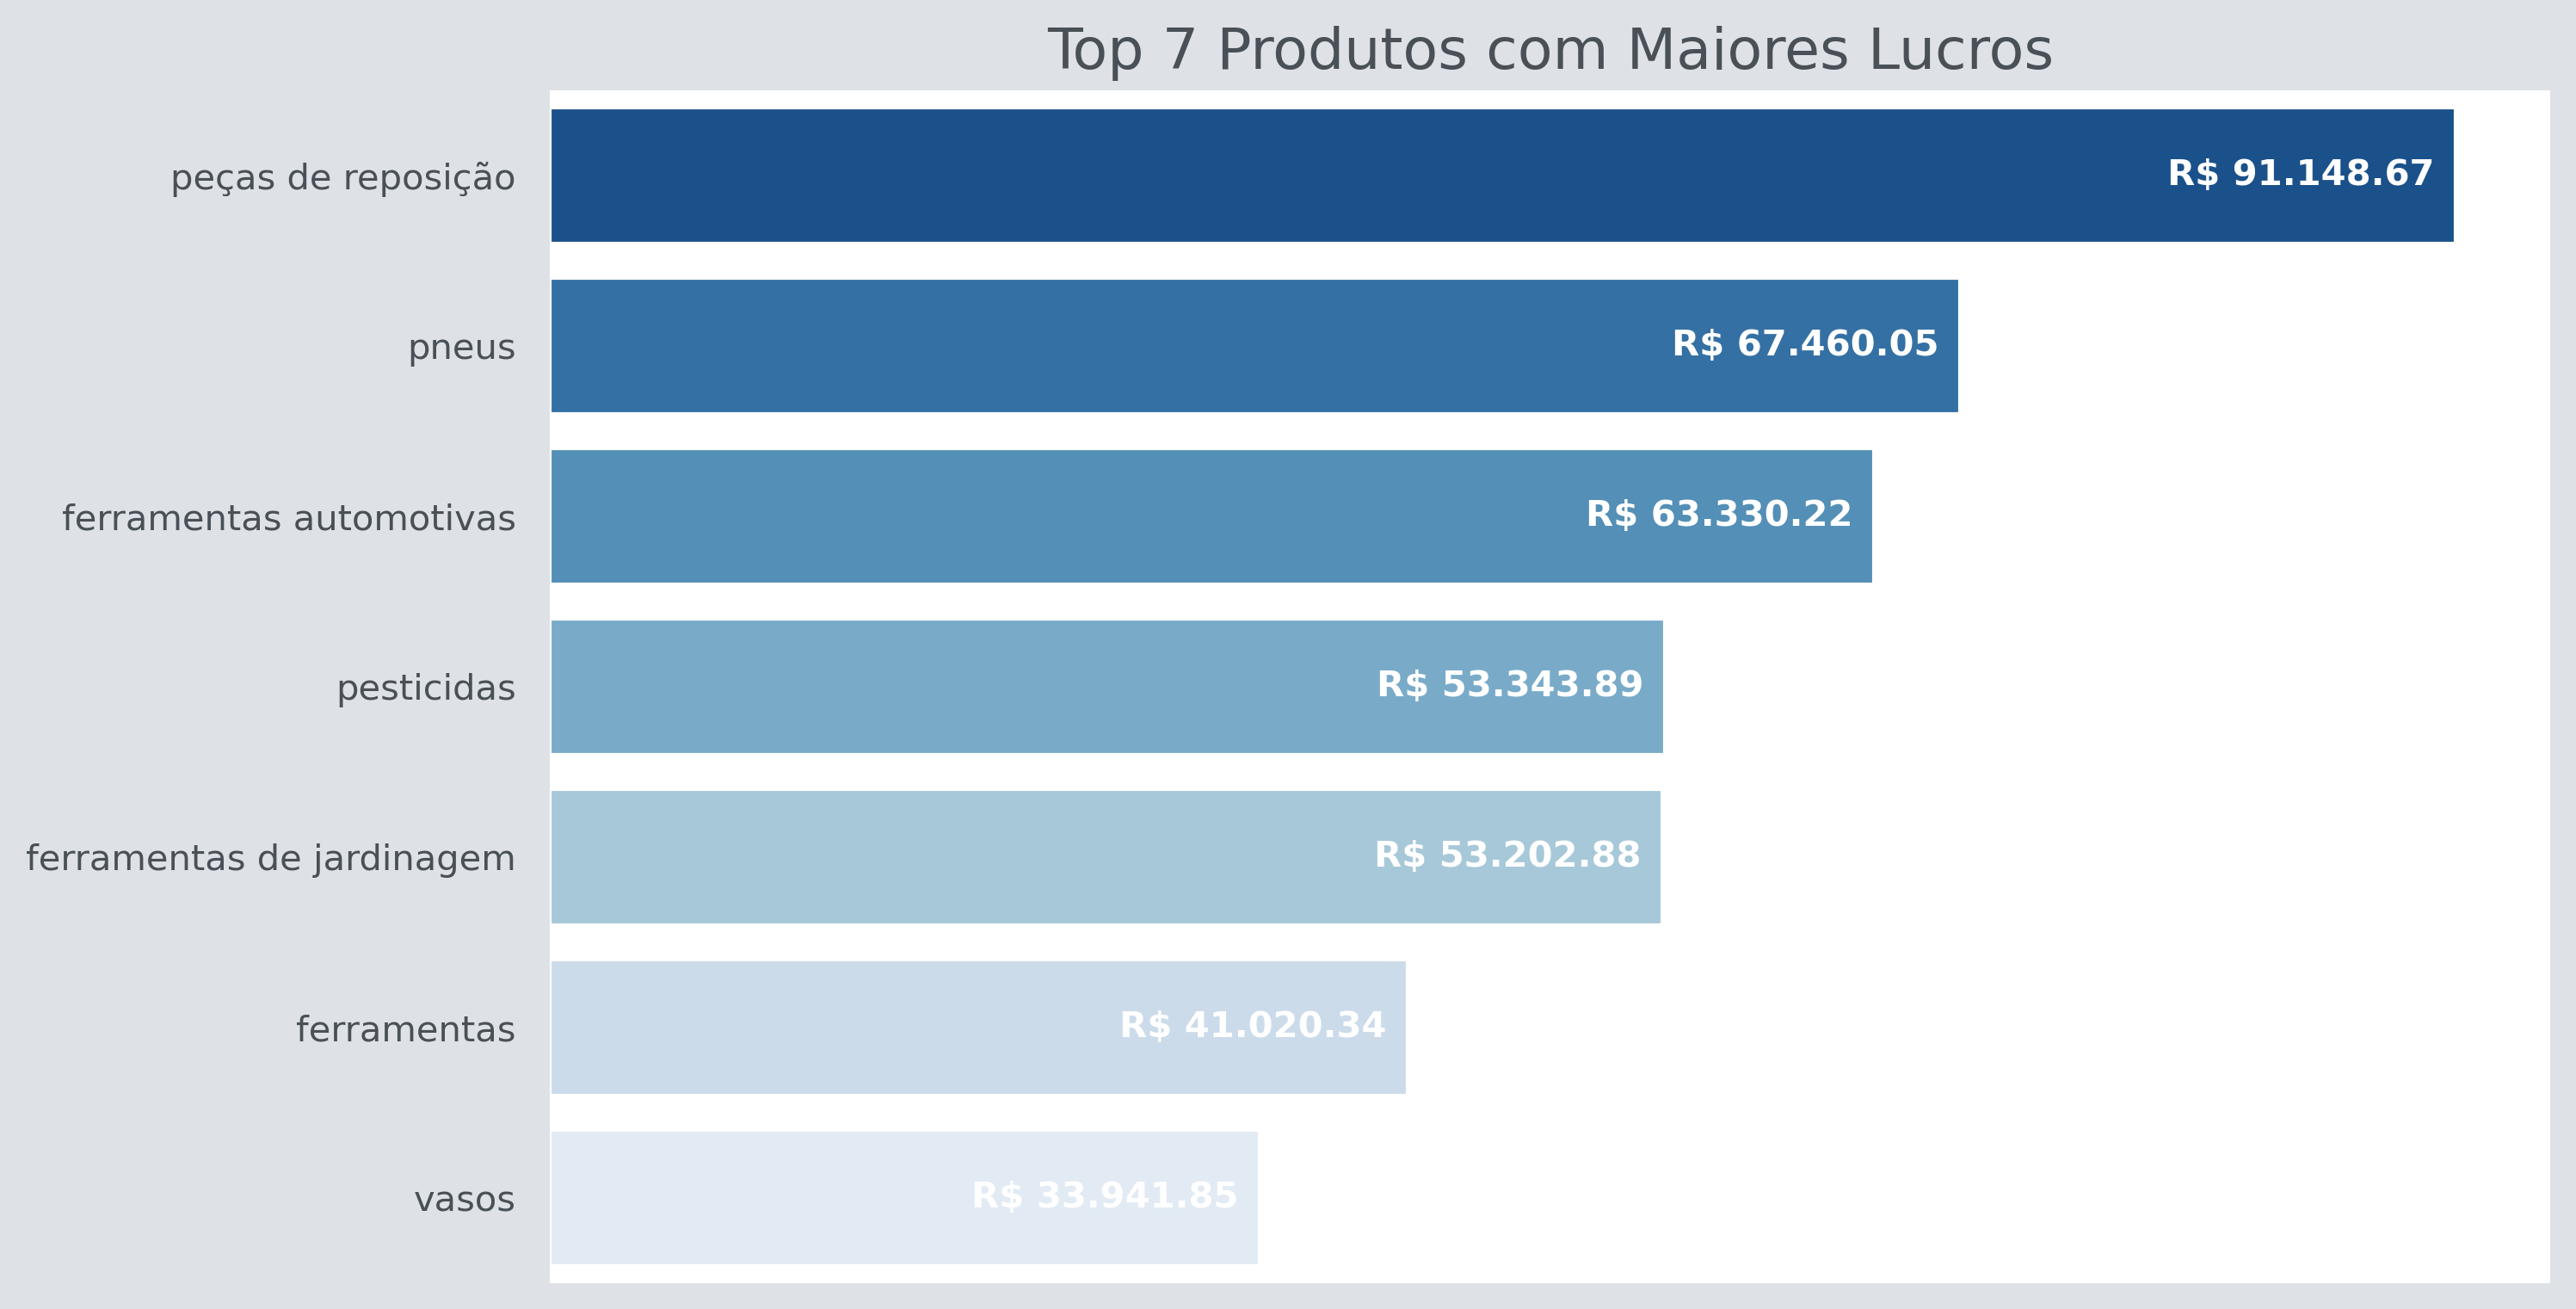

In [14]:
# Configurando o tema do Seaborn
sns.set_theme(style="white")

# Criando o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
fig.set_facecolor(CINZA4)
ax.spines[['top', 'bottom', "right", "left"]].set_visible(False)

sns.barplot(
    data=top7.head(7),
    y="tipo_produto",
    x="lucro",
    palette="Blues_r",
    ax=ax
)

# Adicionando título e rótulos
ax.set_title("Top 7 Produtos com Maiores Lucros", fontsize=16, color=CINZA2)
ax.set_xlabel("")
ax.set_ylabel("")

# Ajustando os ticks
ax.set_xticks([])
ax.yaxis.set_tick_params(labelsize=10, labelcolor=CINZA2)

# Adicionando os valores ao lado das barras
for bar in ax.patches:
    value = f"R$ {bar.get_width():,.2f}".replace(",", ".")
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.annotate(value, (x - 1e3, y), ha="right", va="center", fontsize=10, fontweight="bold",color="white")

plt.show()

Desafio 1: Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?


In [15]:
df_vendas_anuais = df_vendas_anuais.reset_index()
df_vendas_anuais

,ano,vendas
0,2016,1402652.33
1,2017,1489179.52
2,2018,1884161.41
3,2019,2305006.29


In [16]:
lucro_anual = vendas[["lucro"]].copy()
lucro_anual['ano'] = vendas['data_pedido'].dt.year
display(lucro_anual)

lucro_anual = lucro_anual.groupby(by=["ano"]).sum().reset_index()
display(lucro_anual)


,lucro,ano
0,71.26,2018
1,373.29,2018
2,11.68,2018
3,-651.15,2017
4,4.28,2017
...,...,...
8935,25.88,2018
8936,48.96,2019
8937,94.60,2019
8938,6.96,2016


,ano,lucro
0,2016,75033.63
1,2017,101265.15
2,2018,129862.44
3,2019,148097.30


In [17]:
lucro_anual

,ano,lucro
0,2016,75033.63
1,2017,101265.15
2,2018,129862.44
3,2019,148097.30


/tmp/ipykernel_15326/2017118718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lucro_anual, x="ano", y="lucro", palette=colors,ax=ax)


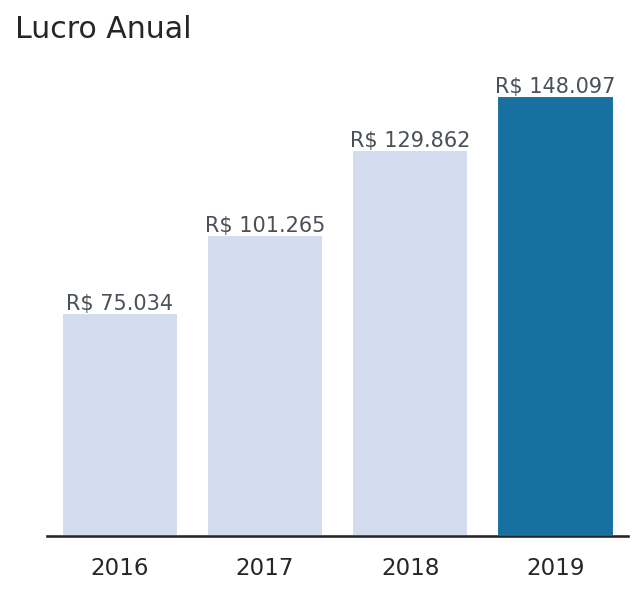

In [18]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=150)
fig.suptitle("Lucro Anual", x=0.2)

colors = [AZUL2 if ano == 2019 else AZUL5 for ano in lucro_anual["ano"]]
sns.barplot(data=lucro_anual, x="ano", y="lucro", palette=colors,ax=ax)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_yticks([])

for bar in ax.patches:
    value = f"R$ {bar.get_height():,.0f}".replace(",", ".")
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(
        value, (x, y), ha="center", va="bottom", fontsize=10, color=CINZA2
    )

sns.despine(left=True)
plt.show()

Desafio 2: Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.

In [19]:
faturamento = vendas[["tipo_produto","vendas"]].copy()

In [20]:
fat10 = faturamento.groupby("tipo_produto").agg("sum").sort_values(
    by="vendas", ascending=False
).reset_index().loc[:9]


/tmp/ipykernel_15326/1392146362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fat10, x=fat10.vendas, y=fat10.tipo_produto, palette=bar_colors)


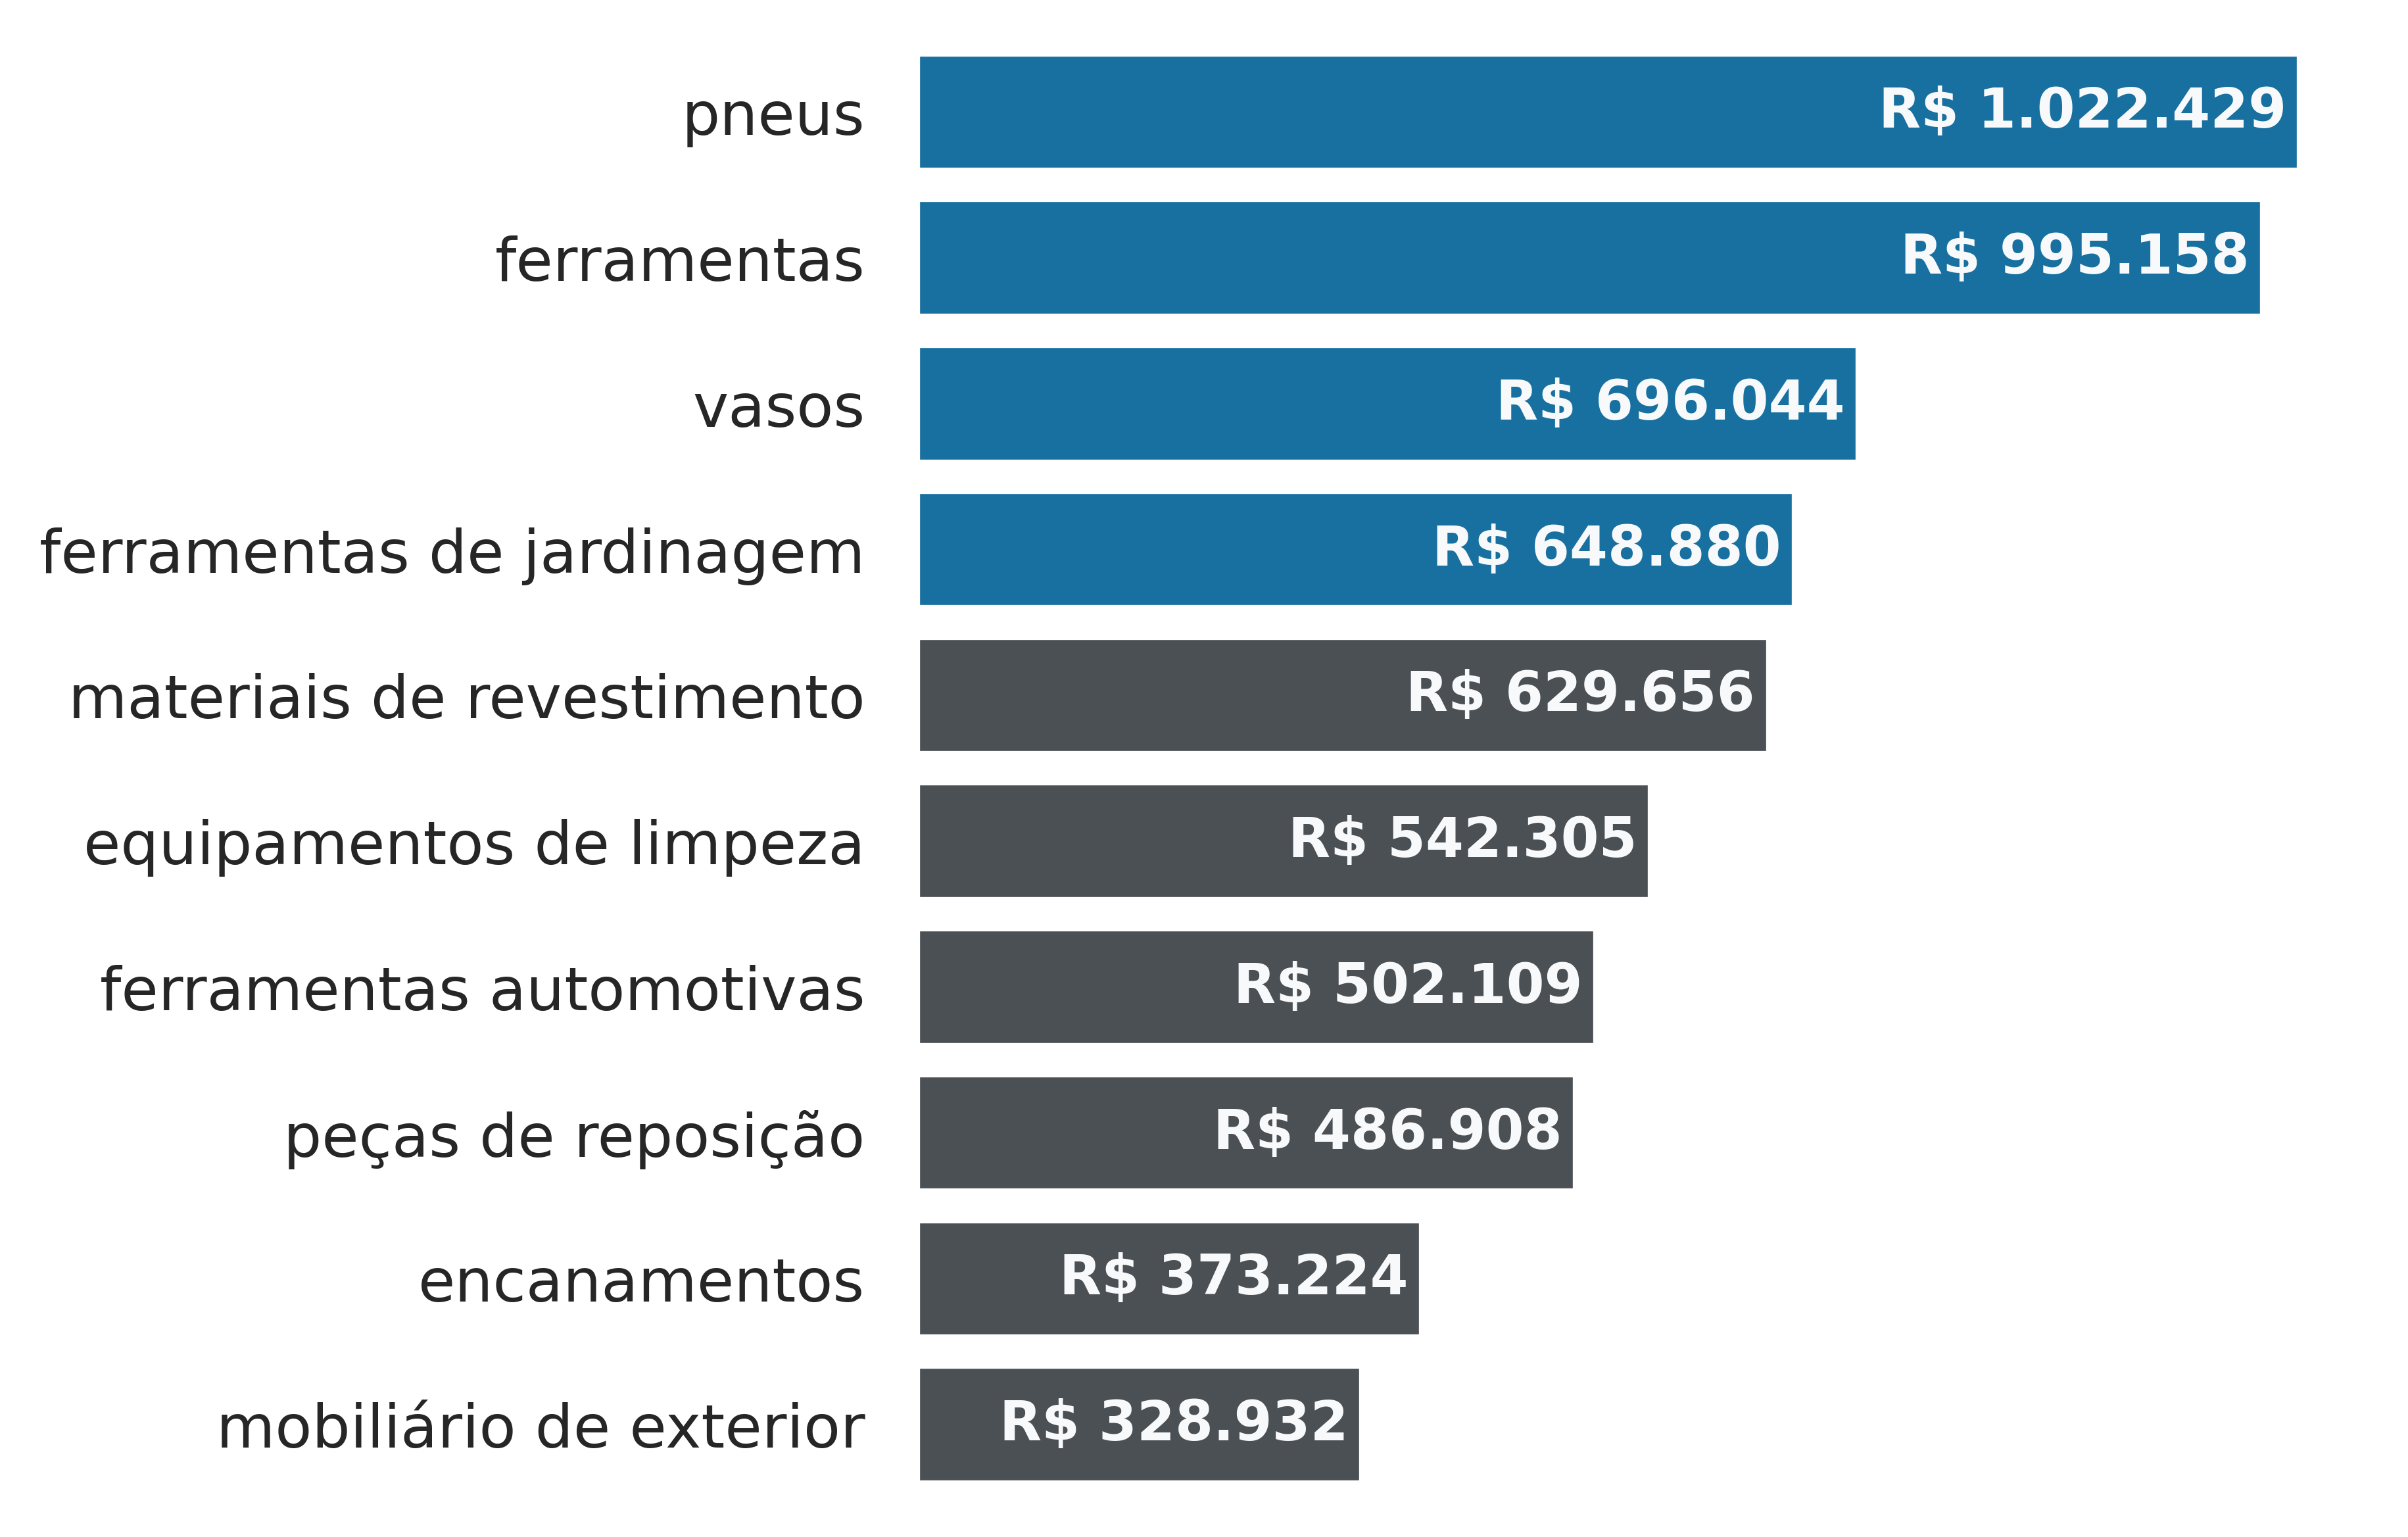

In [30]:
bar_colors = [AZUL2 if i <= 3 else CINZA2 for i in range(fat10.tipo_produto.size)]


fig, ax = plt.subplots(dpi=600)
fig.subplots_adjust(right=0.7)
ax = sns.barplot(data=fat10, x=fat10.vendas, y=fat10.tipo_produto, palette=bar_colors)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])

for i, valor in enumerate(fat10["vendas"]):
    qtd = f"R$ {valor:,.0f}".replace(",", ".")
    offset = 1e4  # offset de 10.000
    ax.text(
        valor - offset,
        i,
        qtd,
        color=CINZA5,
        fontsize=10,
        fontweight="bold",
        ha="right",
        va="center",
    )

sns.despine(left=True, bottom=True)
plt.show()
